# Ural Federal University - Май 2022
## Межгалактический Хакатон 2022
Задача информационной безопасности: обнаружение атак на киберфизические системы<br>
Набор данных включает в себя состояние оборудования и характеристики очищаемой воды, а также сетевой трафик. Атаки в обучающем наборе данных размечены вручную. 
С помощью размеченных данных необходимо научиться определять атаки для тестового набора данных.<br>
________________________________________________________________________________
*Датасет Dataset to Support Research in the Design of Secure Water Treatment Systems (SWaT dataset)* -<br>
https://drive.google.com/u/0/uc?id=18BYm7zwvKvA4xdLsWgrWxNwYt4ttGcUJ&export=download&confirm=t<br>
Ссылка на GitHub c репозиторием - https://github.com/EkaterinaVZ/hackathon_2022
________________________________________________________________________________
##Часть 1/3

### Данный код выполняет следующие действия:

<ul> <li>Считывает необработанные данные из Dataset to Support Research in the Design of Secure Water Treatment Systems (SWaT dataset)
https://drive.google.com/u/0/uc?id=18BYm7zwvKvA4xdLsWgrWxNwYt4ttGcUJ&export=download&confirm=t в формате XLSX-файла и сохраняет в CSV-файл</li> 
<li>Форматирует все данные в числовые значения (кроме целевого столбца "Normal/Attack")</li>
<li>Удаляет дубликаты, корректирует часть неверно занесенных данных в целевом столбце 'Normal/Attack'</li>
<li>Визуализирует данные с помощью pairplot, boxplot и корреляционной матрицы</li>
<li>Сохраняет отформатированные данные в новый файл, используя метод с параметрами: DF_SW.to_csv('/content/drive/MyDrive/Хакатон_2022/Datasets/Attack.csv', sep=';', index=False)</li></ul>


###Log
<ul>
<li>Изменен формат столбца 'Timestamp' во float</li>
<li>Добавлена визуализация данных 17.05.2022</li>
<li>Изменин способ загрузки исходного датасета (18.05.2022)</li></ul>

# 1 - Очистка и подготовка данных<br>
### 1A - Импорт основных библиотек

Устанавливаем утилиту wget для загрузки файлов

In [ ]:
!pip install wget

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import wget

### 1B - Перезапись данных в формат csv, обзор данных

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Считываем файл в формате excel и перезаписываем в csv формат

In [ ]:
file = wget.download('https://drive.google.com/u/0/uc?id=18BYm7zwvKvA4xdLsWgrWxNwYt4ttGcUJ&export=download&confirm=t')

In [ ]:
read_file = pd.read_excel(file)


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
read_file.to_csv(file, index=False, header=False)

In [ ]:
DF_SW = pd.read_csv(file, delimiter=',', decimal=',')
DF_SW

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,9,28,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128152,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128152,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128152,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.53435,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128152,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.56926,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128152,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2/1/2016 2:59:55 PM,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.1535,0.8650241,189.022,0,1,1,1,Normal
449915,2/1/2016 2:59:56 PM,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.0734,0.8650241,188.9259,0,1,1,1,Normal
449916,2/1/2016 2:59:57 PM,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.8650241,188.9259,0,1,1,1,Normal
449917,2/1/2016 2:59:58 PM,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.8650241,188.9259,0,1,1,1,Normal


In [ ]:
# проверяем формат названий столбцов
DF_SW.columns


Index([' Timestamp', 'FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201',
       'AIT202', 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203',
       ' P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', ' MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402',
       'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501',
       'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504',
       'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602',
       'P603', 'Normal/Attack'],
      dtype='object')

Выделяем столбец с целевыми показателями

In [ ]:
# В качестве столбца с целевыми показателями (target) берем столбец 'Normal/Attack' 
target = pd.DataFrame(data=DF_SW['Normal/Attack'], dtype='category', columns=['Normal/Attack'])

In [ ]:
# убираем столбец с целевыми показателями (target) из датафрейма
target = pd.DataFrame(DF_SW['Normal/Attack'])
DF_SW.drop(columns=['Normal/Attack'], inplace=True)
DF_SW.shape

(449919, 52)

In [ ]:
#проверяем столбец с целевыми показателями
target['Normal/Attack'].nunique()

3

In [ ]:
target['Normal/Attack'].unique()

array(['Normal', 'Attack', 'A ttack'], dtype=object)

In [ ]:
# Заменяем некорректно размеченные данные
target.replace('A ttack', 'Attack', inplace=True)

In [ ]:
target['Normal/Attack'].unique()

array(['Normal', 'Attack'], dtype=object)

In [ ]:
DF_SW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 52 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0    Timestamp  449919 non-null  object
 1   FIT101      449919 non-null  object
 2   LIT101      449919 non-null  object
 3    MV101      449919 non-null  int64 
 4   P101        449919 non-null  int64 
 5   P102        449919 non-null  int64 
 6    AIT201     449919 non-null  object
 7   AIT202      449919 non-null  object
 8   AIT203      449919 non-null  object
 9   FIT201      449919 non-null  object
 10   MV201      449919 non-null  int64 
 11   P201       449919 non-null  int64 
 12   P202       449919 non-null  int64 
 13  P203        449919 non-null  int64 
 14   P204       449919 non-null  int64 
 15  P205        449919 non-null  int64 
 16  P206        449919 non-null  int64 
 17  DPIT301     449919 non-null  object
 18  FIT301      449919 non-null  object
 19  LIT301      449919 non-

In [ ]:
DF_SW.describe()

,MV101,P101,P102,MV201,P201,P202,P203,P204,P205,P206,...,P401,P402,P403,P404,UV401,P501,P502,P601,P602,P603
count,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.0,449919.000000,449919.000000,449919.000000,449919.000000,...,449919.0,449919.000000,449919.000000,449919.0,449919.000000,449919.000000,449919.0,449919.0,449919.000000,449919.0
mean,1.665335,1.693251,1.006946,1.691584,1.121068,1.0,1.690689,1.000124,1.691131,1.000122,...,1.0,1.928792,1.000133,1.0,1.925849,1.925862,1.0,1.0,1.009099,1.0
std,0.482323,0.461145,0.083051,0.470611,0.326207,0.0,0.462210,0.011156,0.462027,0.011056,...,0.0,0.257173,0.011547,0.0,0.262017,0.261995,0.0,0.0,0.094956,0.0
min,0.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.0,2.000000,1.000000,1.0,2.000000,2.000000,1.0,1.0,1.000000,1.0
50%,2.000000,2.000000,1.000000,2.000000,1.000000,1.0,2.000000,1.000000,2.000000,1.000000,...,1.0,2.000000,1.000000,1.0,2.000000,2.000000,1.0,1.0,1.000000,1.0
75%,2.000000,2.000000,1.000000,2.000000,1.000000,1.0,2.000000,1.000000,2.000000,1.000000,...,1.0,2.000000,1.000000,1.0,2.000000,2.000000,1.0,1.0,1.000000,1.0
max,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,2.000000,2.000000,2.000000,...,1.0,2.000000,2.000000,1.0,2.000000,2.000000,1.0,1.0,2.000000,1.0


### 1C - Замена или удаление пустых и нулевых значений

In [ ]:
# Удаляем столбцы, в которых все значения NaN
DF_SW.dropna(how='all', axis=1, inplace=True)
# Удаляем столбцы только с одним уникальным значением
DF_SW.drop(columns=DF_SW.columns[DF_SW.nunique()==1], inplace=True)

In [ ]:
DF_SW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 45 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0    Timestamp  449919 non-null  object
 1   FIT101      449919 non-null  object
 2   LIT101      449919 non-null  object
 3    MV101      449919 non-null  int64 
 4   P101        449919 non-null  int64 
 5   P102        449919 non-null  int64 
 6    AIT201     449919 non-null  object
 7   AIT202      449919 non-null  object
 8   AIT203      449919 non-null  object
 9   FIT201      449919 non-null  object
 10   MV201      449919 non-null  int64 
 11   P201       449919 non-null  int64 
 12  P203        449919 non-null  int64 
 13   P204       449919 non-null  int64 
 14  P205        449919 non-null  int64 
 15  P206        449919 non-null  int64 
 16  DPIT301     449919 non-null  object
 17  FIT301      449919 non-null  object
 18  LIT301      449919 non-null  object
 19  MV301       449919 non-

In [ ]:
DF_SW.shape # 7 столбцов из 52 были удалены

(449919, 45)

Можем заметить, что многие столбцы имеют тип object. Необходимо их перевести из категориальных данных в числовые.

### 1D - Изменение типов значений столбцов

In [ ]:
DF_SW.head(3)

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,FIT501,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,1.723789,1.279621,0.7352687,0.3077859,2,250.8652,1.649953,189.5988,0.000128152,1
1,28/12/2015 10:00:01 AM,2.446274,522.886,2,2,1,262.0161,8.396437,328.6337,2.445391,...,1.723789,1.297554,0.7352687,0.3077859,2,250.8652,1.649953,189.6789,0.000128152,1
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,1.723404,1.293967,0.7352687,0.3086186,2,250.8812,1.649953,189.6789,0.000128152,1


Дату и время с помощью функции pandas pd.to_datetime. и astype() переводим в формат float

In [ ]:
import datetime, time

In [ ]:
DF_SW[' Timestamp'] = pd.to_datetime(DF_SW[' Timestamp'])


In [ ]:
DF_SW[' Timestamp'] = pd.to_datetime(DF_SW[' Timestamp'], '%d/%m/%Y').dt.strftime('%Y%m%d').astype(float)

In [ ]:
DF_SW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 45 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0    Timestamp  449919 non-null  float64
 1   FIT101      449919 non-null  object 
 2   LIT101      449919 non-null  object 
 3    MV101      449919 non-null  int64  
 4   P101        449919 non-null  int64  
 5   P102        449919 non-null  int64  
 6    AIT201     449919 non-null  object 
 7   AIT202      449919 non-null  object 
 8   AIT203      449919 non-null  object 
 9   FIT201      449919 non-null  object 
 10   MV201      449919 non-null  int64  
 11   P201       449919 non-null  int64  
 12  P203        449919 non-null  int64  
 13   P204       449919 non-null  int64  
 14  P205        449919 non-null  int64  
 15  P206        449919 non-null  int64  
 16  DPIT301     449919 non-null  object 
 17  FIT301      449919 non-null  object 
 18  LIT301      449919 non-null  object 
 19  MV

Теперь мы должны изменить тип данных в тех столбцах, где значения сохраняются в виде строк (категориальные данные)

In [ ]:
# Используем в том случае, если не хотим оставлять параметр ' Timestamp' 
# tm = DF_SW.iloc[:, 0]


In [ ]:
# удаляем стобец' Timestamp', чтобы не переводить его дополнительно в числовой формат
DF_SW = DF_SW.drop(columns=' Timestamp')

In [ ]:
# Выбираем все столбцы с типом object и переводим их в числовой формат
DF_SW = DF_SW.apply(pd.to_numeric)
DF_SW

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT501,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,1.723789,1.279621,0.735269,0.307786,2,250.8652,1.649953,189.5988,0.000128,1
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,1.723789,1.297554,0.735269,0.307786,2,250.8652,1.649953,189.6789,0.000128,1
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,1.723404,1.293967,0.735269,0.308619,2,250.8812,1.649953,189.6789,0.000128,1
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,1.723404,1.281158,0.735269,0.308619,2,250.8812,1.649953,189.6148,0.000128,1
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,1.723404,1.281158,0.735269,0.308619,2,250.8812,1.649953,189.5027,0.000128,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,1.716483,1.288971,0.734885,0.306569,2,251.1535,0.865024,189.0220,0.000000,1
449915,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,1.714560,1.272704,0.734885,0.306569,2,251.0734,0.865024,188.9259,0.000000,1
449916,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,1.714560,1.269502,0.734885,0.306569,2,251.0734,0.865024,188.9259,0.000000,1
449917,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,1.714560,1.263866,0.734885,0.307978,2,251.0734,0.865024,188.9259,0.000000,1


In [ ]:
DF_SW.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT501,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602
count,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,...,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000
mean,1.714346,607.019967,1.665335,1.693251,1.006946,210.297302,8.528535,320.301478,1.702908,1.691584,...,1.603014,1.195462,0.679549,0.283806,1.925862,232.173817,1.013408,174.714484,0.016566,1.009099
std,1.191716,125.303003,0.482323,0.461145,0.083051,35.157909,0.114844,16.631029,1.130277,0.470611,...,0.444681,0.331968,0.189503,0.080924,0.261995,61.750930,0.412723,47.479809,0.159603,0.094956
min,0.000000,189.826300,0.000000,1.000000,1.000000,168.033800,6.000000,285.337100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,9.468726,0.000000,3.140220,0.000000,1.000000
25%,0.000000,510.011100,1.000000,1.000000,1.000000,177.102000,8.441618,306.383000,0.000000,1.000000,...,1.719559,1.272576,0.730660,0.306249,2.000000,248.029400,0.816967,186.698900,0.000000,1.000000
50%,2.477020,530.422500,2.000000,2.000000,1.000000,193.508100,8.551525,321.661100,2.446673,2.000000,...,1.726993,1.286410,0.732708,0.306633,2.000000,249.295100,0.961138,187.724300,0.000000,1.000000
75%,2.577907,727.432100,2.000000,2.000000,1.000000,253.845200,8.610806,331.684200,2.454362,2.000000,...,1.733145,1.300115,0.734885,0.308106,2.000000,250.881200,1.409669,189.118200,0.000128,1.000000
max,2.760145,925.032300,2.000000,2.000000,2.000000,267.719800,8.733210,384.465500,2.826899,2.000000,...,1.753653,1.360318,0.741542,0.311693,2.000000,254.341800,1.970333,191.986000,1.802710,2.000000


In [ ]:
DF_SW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 44 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   FIT101   449919 non-null  float64
 1   LIT101   449919 non-null  float64
 2    MV101   449919 non-null  int64  
 3   P101     449919 non-null  int64  
 4   P102     449919 non-null  int64  
 5    AIT201  449919 non-null  float64
 6   AIT202   449919 non-null  float64
 7   AIT203   449919 non-null  float64
 8   FIT201   449919 non-null  float64
 9    MV201   449919 non-null  int64  
 10   P201    449919 non-null  int64  
 11  P203     449919 non-null  int64  
 12   P204    449919 non-null  int64  
 13  P205     449919 non-null  int64  
 14  P206     449919 non-null  int64  
 15  DPIT301  449919 non-null  float64
 16  FIT301   449919 non-null  float64
 17  LIT301   449919 non-null  float64
 18  MV301    449919 non-null  int64  
 19  MV302    449919 non-null  int64  
 20   MV303   449919 non-null  

In [ ]:
# Возвращаем столбец 'Timestamp', если работаем с ним
# DF_SW['Timestamp'] = tm

Проводим проверку на дубликаты и удаляем дубли

In [ ]:
DF_SW.duplicated().sum()

8123

In [ ]:
DF_SW['A/N'] = target
DF_SW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 45 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   FIT101   449919 non-null  float64
 1   LIT101   449919 non-null  float64
 2    MV101   449919 non-null  int64  
 3   P101     449919 non-null  int64  
 4   P102     449919 non-null  int64  
 5    AIT201  449919 non-null  float64
 6   AIT202   449919 non-null  float64
 7   AIT203   449919 non-null  float64
 8   FIT201   449919 non-null  float64
 9    MV201   449919 non-null  int64  
 10   P201    449919 non-null  int64  
 11  P203     449919 non-null  int64  
 12   P204    449919 non-null  int64  
 13  P205     449919 non-null  int64  
 14  P206     449919 non-null  int64  
 15  DPIT301  449919 non-null  float64
 16  FIT301   449919 non-null  float64
 17  LIT301   449919 non-null  float64
 18  MV301    449919 non-null  int64  
 19  MV302    449919 non-null  int64  
 20   MV303   449919 non-null  

In [ ]:
DF_SW = DF_SW.drop_duplicates()

In [ ]:
DF_SW.duplicated().sum()

0

In [ ]:
# приводим значения столбца 'A/N' к числовому виду 0 (Normal) и 1 (Attack)
DF_SW['A/N'] = DF_SW['A/N'].map({'Normal': 0, 'Attack': 1})
DF_SW

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602,A/N
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,1.279621,0.735269,0.307786,2,250.8652,1.649953,189.5988,0.000128,1,0
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,1.297554,0.735269,0.307786,2,250.8652,1.649953,189.6789,0.000128,1,0
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,1.293967,0.735269,0.308619,2,250.8812,1.649953,189.6789,0.000128,1,0
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,1.281158,0.735269,0.308619,2,250.8812,1.649953,189.6148,0.000128,1,0
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,1.281158,0.735269,0.308619,2,250.8812,1.649953,189.5027,0.000128,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,1.288971,0.734885,0.306569,2,251.1535,0.865024,189.0220,0.000000,1,0
449915,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,1.272704,0.734885,0.306569,2,251.0734,0.865024,188.9259,0.000000,1,0
449916,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,1.269502,0.734885,0.306569,2,251.0734,0.865024,188.9259,0.000000,1,0
449917,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,1.263866,0.734885,0.307978,2,251.0734,0.865024,188.9259,0.000000,1,0


In [ ]:
# смотрим количество значений 0 и 1 в столбце 'A/N'
DF_SW['A/N'].value_counts()

0    388150
1     53648
Name: A/N, dtype: int64

In [ ]:
DF_SW.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602,A/N
count,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,...,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000
mean,1.714200,607.044093,1.665297,1.693199,1.006935,210.297405,8.528540,320.299749,1.702751,1.691529,...,1.195455,0.679544,0.283804,1.925858,232.172154,1.013446,174.713153,0.016545,1.009086,0.121431
std,1.191771,125.286428,0.482315,0.461167,0.082989,35.161601,0.114827,16.632431,1.130334,0.470635,...,0.331988,0.189512,0.080925,0.262003,61.754452,0.412717,47.482602,0.159458,0.094885,0.326628
min,0.000000,189.826300,0.000000,1.000000,1.000000,168.033800,6.000000,285.337100,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,9.468726,0.000000,3.140220,0.000000,1.000000,0.000000
25%,0.000000,510.011100,1.000000,1.000000,1.000000,177.102000,8.441298,306.383000,0.000000,1.000000,...,1.272576,0.730660,0.306249,2.000000,248.029400,0.816967,186.698900,0.000000,1.000000,0.000000
50%,2.477020,530.422500,2.000000,2.000000,1.000000,193.508100,8.551525,321.661100,2.446545,2.000000,...,1.286410,0.732708,0.306633,2.000000,249.295100,0.961138,187.724300,0.000000,1.000000,0.000000
75%,2.577907,727.353600,2.000000,2.000000,1.000000,254.005400,8.610806,331.684200,2.454362,2.000000,...,1.300115,0.734885,0.308106,2.000000,250.881200,1.409669,189.118200,0.000128,1.000000,0.000000
max,2.760145,925.032300,2.000000,2.000000,2.000000,267.719800,8.733210,384.465500,2.826899,2.000000,...,1.360318,0.741542,0.311693,2.000000,254.341800,1.970333,191.986000,1.802710,2.000000,1.000000



Проверяем данные на отсутствие редких 

In [ ]:
DF_SW.value_counts()

FIT101    LIT101     MV101  P101  P102   AIT201   AIT202    AIT203    FIT201     MV201   P201  P203   P204  P205  P206  DPIT301    FIT301    LIT301     MV301  MV302   MV303  MV304  P302  AIT401    AIT402    FIT401    LIT401    P402  P403  UV401  AIT501    AIT502    AIT503    AIT504    FIT501    FIT502    FIT503    FIT504    P501  PIT501    PIT502    PIT503    FIT601    P602  A/N
0.000000  191.0039  0       1     1     181.1395  8.549923  319.7898  2.282895  2       1      2     1      2     1     20.014090  2.197739  934.3358   1      2      1       1      2     148.8080  146.8342  1.720053  899.6924  2     1     2      7.830556  138.1953  261.7598  15.03461  1.730582  1.286794  0.732324  0.306761  2     249.5834  0.977157  187.9166  0.000000  1     1      1
2.547481  564.2977  2       1     1     198.2184  8.608242  312.1764  0.000000  1       1      1     1      1     1     2.602599   0.422125  1005.5110  1      1      2       2      1     148.8032  150.1410  1.726076  971.6355  2   

In [ ]:
DF_SW.columns

Index(['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202',
       'AIT203', 'FIT201', ' MV201', ' P201', 'P203', ' P204', 'P205', 'P206',
       'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303', 'MV304',
       'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P402', 'P403', 'UV401',
       'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503',
       'FIT504', 'P501', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P602',
       'A/N'],
      dtype='object')

# 2 - Визуализация данных

Импорт основных библиотек

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

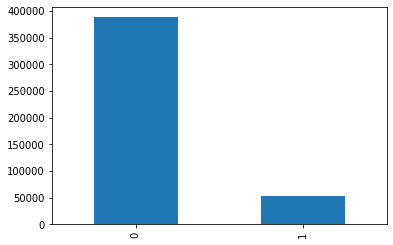

In [ ]:
# визуализируем количество 'Normal' (0) и 'Attack' (1)
DF_SW['A/N'].value_counts().plot(kind='bar')

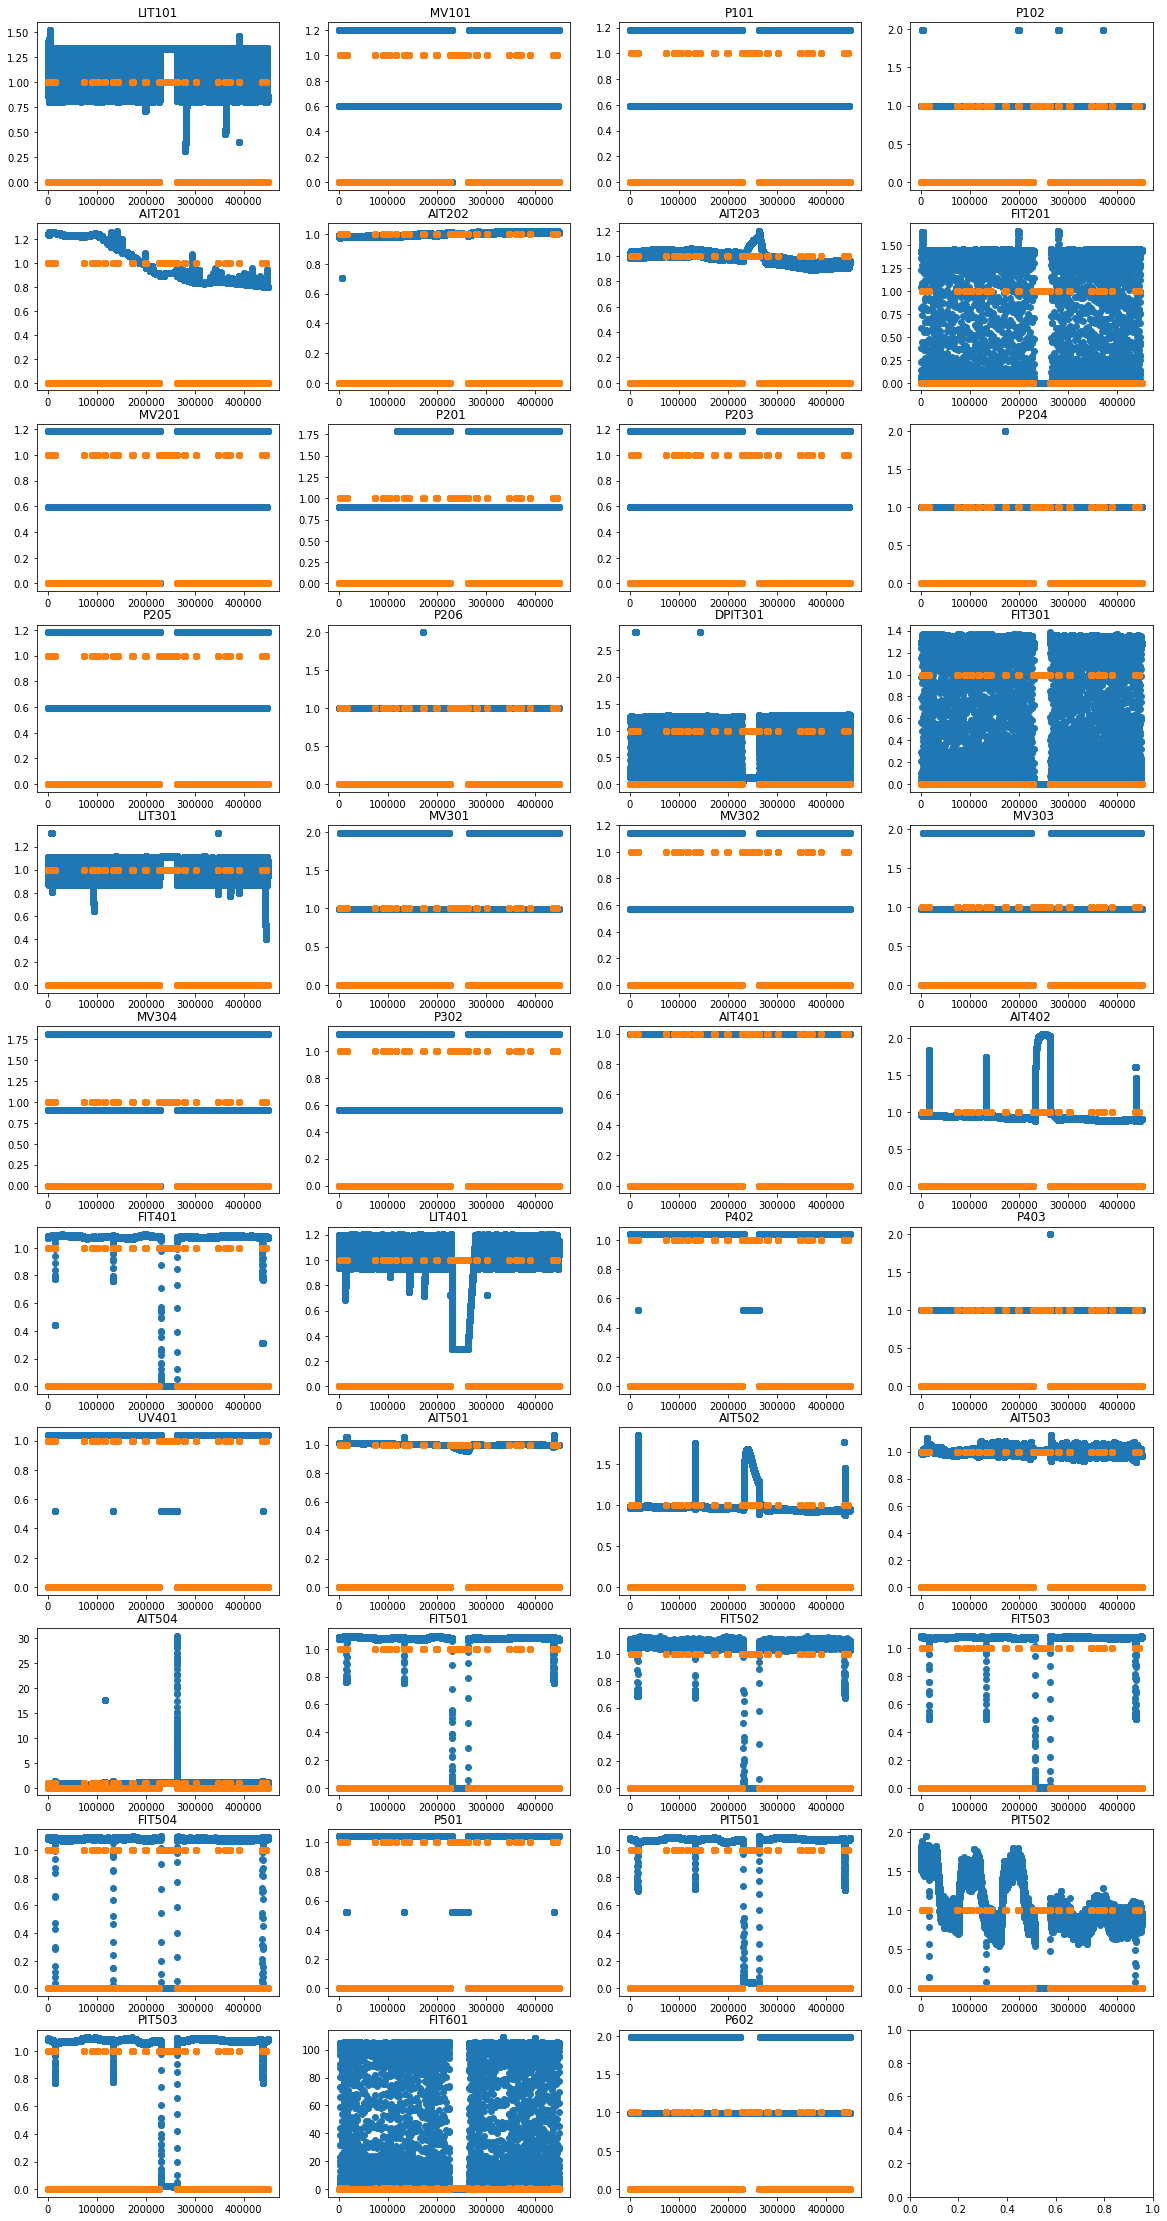

In [ ]:
# визуализируем отношение значения признаков к среднему по столбцу
fig, ax = plt.subplots(11, 4, figsize=(20,40))

for i in range(11):
  for j in range(4):
    if i*4+j+1 < len(DF_SW.columns)-1:
      ax[i][j].scatter(DF_SW.index, DF_SW[DF_SW.columns[i*4+j+1]].values / DF_SW[DF_SW.columns[i*4+j+1]].mean())
      ax[i][j].set_title(DF_SW.columns[i*4+j+1])
      ax[i][j].scatter(DF_SW.index, DF_SW['A/N'])
plt.show()

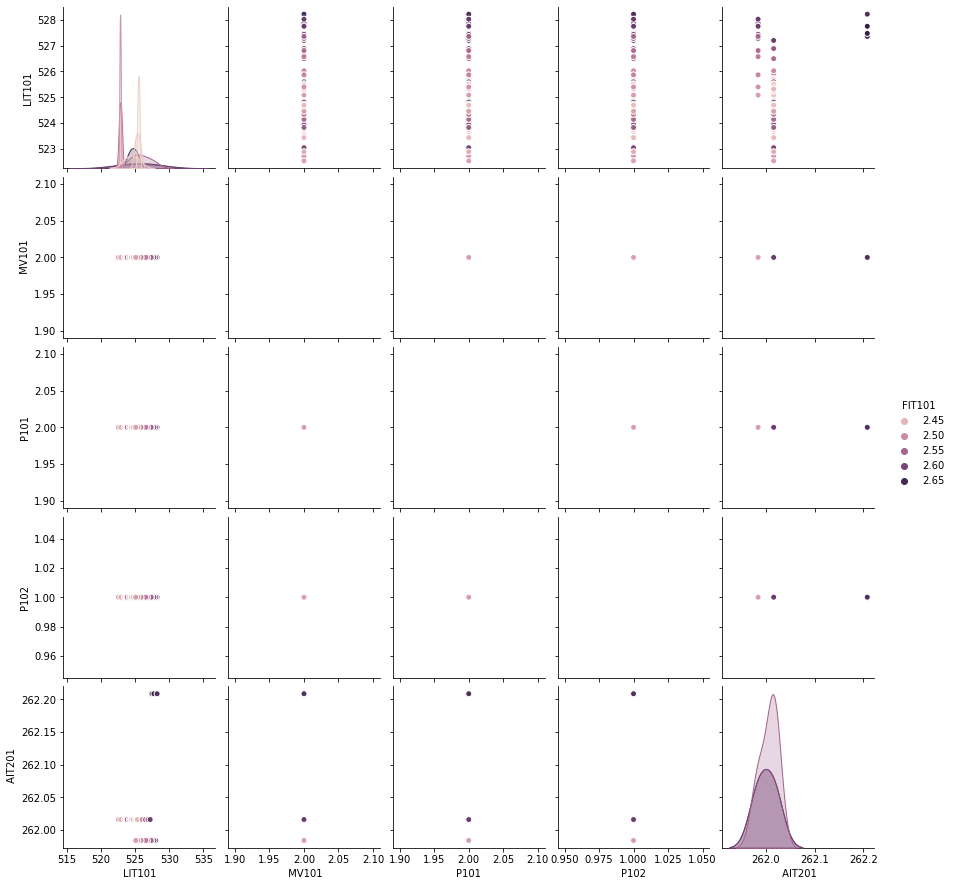

In [ ]:
sn.pairplot(DF_SW.iloc[:100,0:6], hue='FIT101', plot_kws=dict(marker="o", linewidth=1))

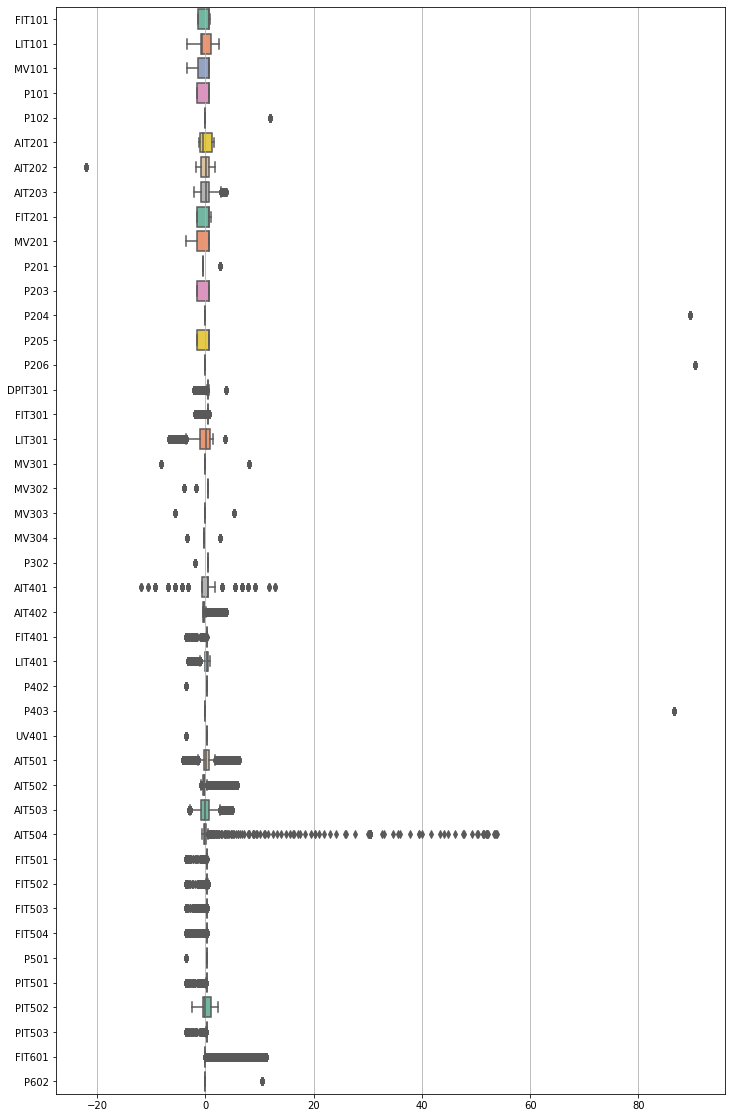

In [ ]:
# Некоторые признаки исключаем

box_columns = DF_SW.columns.drop(['A/N'])
# box_columns =box_columns.columns.drop(['Timestamp'])
data = DF_SW[box_columns]
# Масштабируем данные для диаграммы ящик с усами
scaled = pd.DataFrame(data=StandardScaler().fit_transform(data), columns=box_columns)
# Строим диаграмму ящик с усами
plt.figure(figsize=(12,20))
plt.grid()
sn.boxplot(data=scaled, orient="h", palette="Set2")

Корреляционная матрица для предварительного анализа

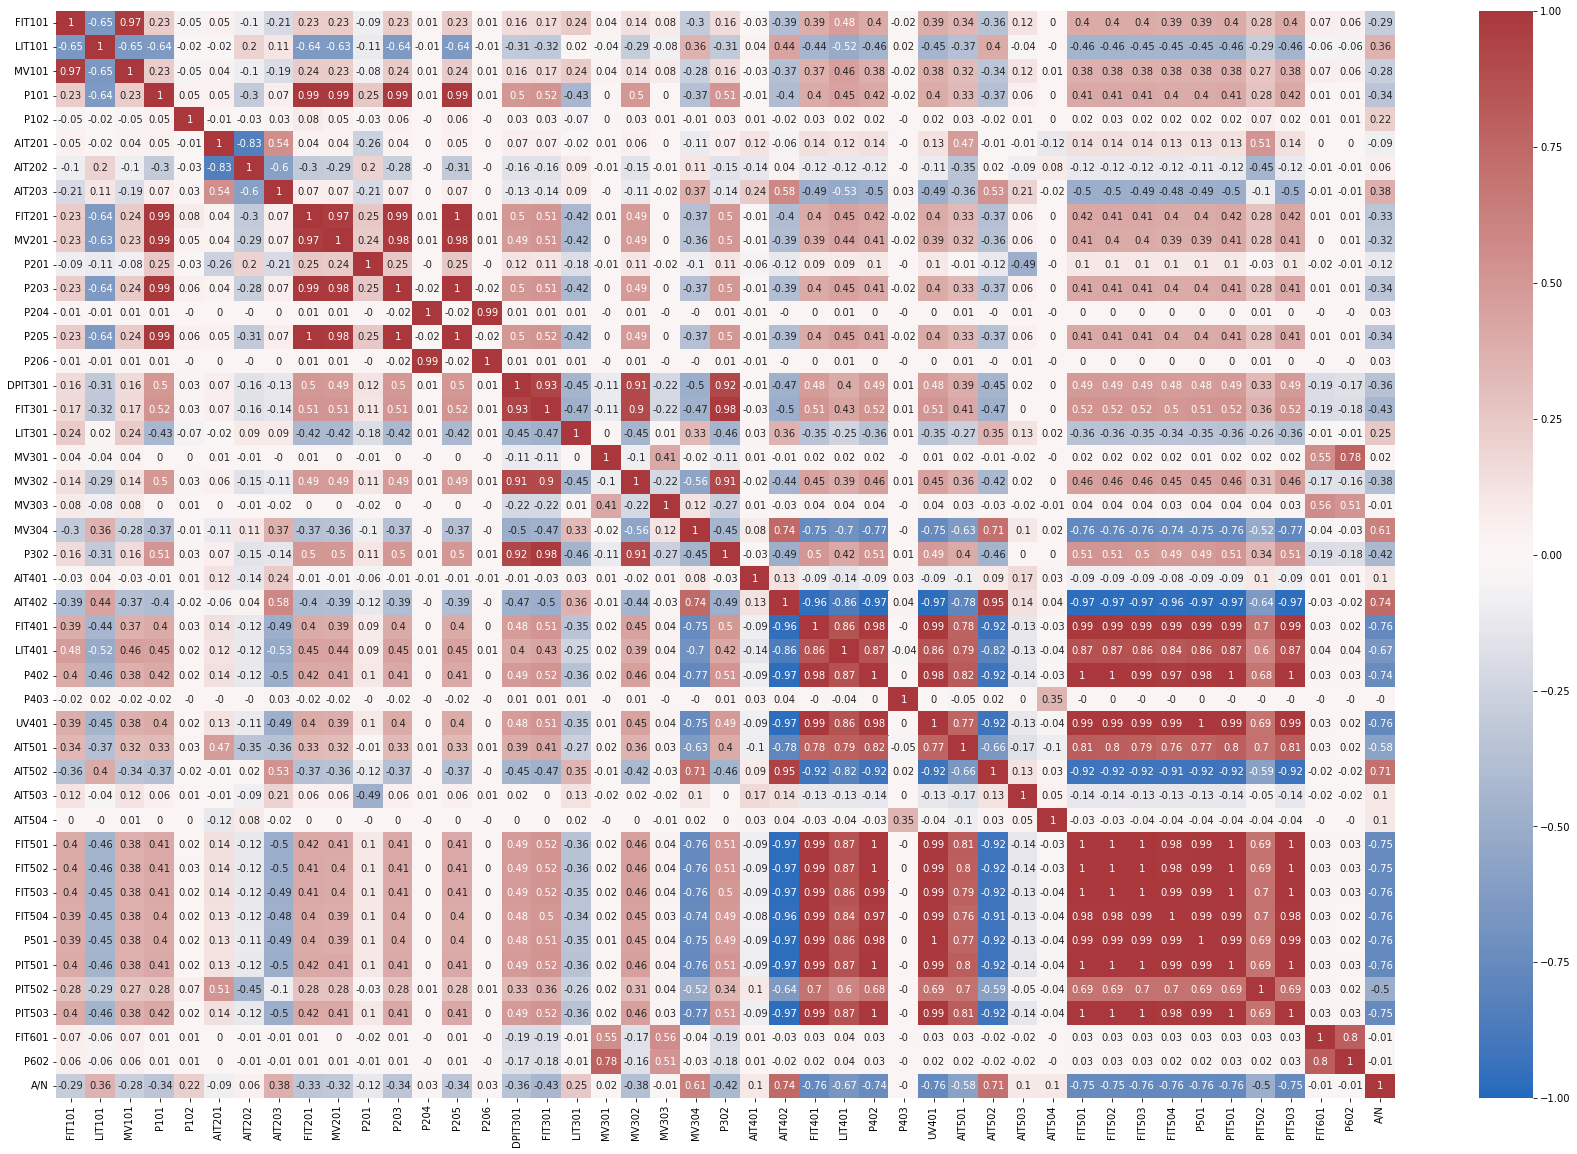

In [ ]:
corr_matrix = DF_SW.corr().round(2)
plt.figure(figsize=(30,20))
sn.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

## Cохранение измененного набора данных в новый файл для задач машинного обучения

In [ ]:
DF_SW

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602,A/N
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,1.279621,0.735269,0.307786,2,250.8652,1.649953,189.5988,0.000128,1,0
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,1.297554,0.735269,0.307786,2,250.8652,1.649953,189.6789,0.000128,1,0
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,1.293967,0.735269,0.308619,2,250.8812,1.649953,189.6789,0.000128,1,0
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,1.281158,0.735269,0.308619,2,250.8812,1.649953,189.6148,0.000128,1,0
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,1.281158,0.735269,0.308619,2,250.8812,1.649953,189.5027,0.000128,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,1.288971,0.734885,0.306569,2,251.1535,0.865024,189.0220,0.000000,1,0
449915,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,1.272704,0.734885,0.306569,2,251.0734,0.865024,188.9259,0.000000,1,0
449916,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,1.269502,0.734885,0.306569,2,251.0734,0.865024,188.9259,0.000000,1,0
449917,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,1.263866,0.734885,0.307978,2,251.0734,0.865024,188.9259,0.000000,1,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Внимание!!! Перед запуском ноутбука укажите желаемый путь для сохранения результатов в файл формата csv**

In [ ]:
# file_output = '/content/drive/MyDrive/Хакатон_2022/Datasets/FIX_Attack.csv'

In [ ]:
DF_SW.to_csv(file_output, sep=';', index=False)

Проверка показала, что наш новый файл не изменился, доступен для чтения pandas read_csv и готов к использованию в качестве чистого набора данных в задачах машинного обучения.

In [ ]:
DF_new = pd.read_csv(file_output, delimiter=';')
DF_new

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602,A/N
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,1.279621,0.735269,0.307786,2,250.8652,1.649953,189.5988,0.000128,1,0
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,1.297554,0.735269,0.307786,2,250.8652,1.649953,189.6789,0.000128,1,0
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,1.293967,0.735269,0.308619,2,250.8812,1.649953,189.6789,0.000128,1,0
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,1.281158,0.735269,0.308619,2,250.8812,1.649953,189.6148,0.000128,1,0
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,1.281158,0.735269,0.308619,2,250.8812,1.649953,189.5027,0.000128,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441793,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,1.288971,0.734885,0.306569,2,251.1535,0.865024,189.0220,0.000000,1,0
441794,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,1.272704,0.734885,0.306569,2,251.0734,0.865024,188.9259,0.000000,1,0
441795,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,1.269502,0.734885,0.306569,2,251.0734,0.865024,188.9259,0.000000,1,0
441796,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,1.263866,0.734885,0.307978,2,251.0734,0.865024,188.9259,0.000000,1,0


In [ ]:
DF_new.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602,A/N
count,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,...,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000,441798.000000
mean,1.714200,607.044093,1.665297,1.693199,1.006935,210.297405,8.528540,320.299749,1.702751,1.691529,...,1.195455,0.679544,0.283804,1.925858,232.172154,1.013446,174.713153,0.016545,1.009086,0.121431
std,1.191771,125.286428,0.482315,0.461167,0.082989,35.161601,0.114827,16.632431,1.130334,0.470635,...,0.331988,0.189512,0.080925,0.262003,61.754452,0.412717,47.482602,0.159458,0.094885,0.326628
min,0.000000,189.826300,0.000000,1.000000,1.000000,168.033800,6.000000,285.337100,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,9.468726,0.000000,3.140220,0.000000,1.000000,0.000000
25%,0.000000,510.011100,1.000000,1.000000,1.000000,177.102000,8.441298,306.383000,0.000000,1.000000,...,1.272576,0.730660,0.306249,2.000000,248.029400,0.816967,186.698900,0.000000,1.000000,0.000000
50%,2.477020,530.422500,2.000000,2.000000,1.000000,193.508100,8.551525,321.661100,2.446545,2.000000,...,1.286410,0.732708,0.306633,2.000000,249.295100,0.961138,187.724300,0.000000,1.000000,0.000000
75%,2.577907,727.353600,2.000000,2.000000,1.000000,254.005400,8.610806,331.684200,2.454362,2.000000,...,1.300115,0.734885,0.308106,2.000000,250.881200,1.409669,189.118200,0.000128,1.000000,0.000000
max,2.760145,925.032300,2.000000,2.000000,2.000000,267.719800,8.733210,384.465500,2.826899,2.000000,...,1.360318,0.741542,0.311693,2.000000,254.341800,1.970333,191.986000,1.802710,2.000000,1.000000


In [ ]:
DF_new.reset_index(drop = True, inplace =True)
DF_SW.reset_index(drop =True, inplace =True)

In [ ]:
DF_SW.compare(DF_new, align_axis=0)

,


Сравниваем датафреймы, если вывод пустой, фреймы данных остаются идентичными, и все в порядке!